In [48]:
import numpy as np
import matplotlib.pyplot as plt

试验了tensordot、einsum两个函数及均值滤波、图像锐化两个卷积核。

In [49]:
def image_convolution(image,kernel,method='tensordot'):
    
    #获取图像通道数
    channels = image.shape[2]
    
    #获取卷积核的大小
    kernel_size = kernel.shape[0]
    
    #添加边界填充
    padding = kernel_size // 2
    padding_image = np.pad(image,((padding,padding),(padding,padding),(0,0)),mode='constant')
    
    #创建并初始化输出图像
    output_image = np.zeros_like(image)
    
    #执行卷积操作
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            #1.提取对应位置的像素矩阵
            patch = padding_image[i:i+kernel_size,j:j+kernel_size,:]
            #2.1.使用tensordot进行卷积计算
            if method == 'tensordot':
                output_image[i, j, :] = np.reshape(np.tensordot(patch, kernel, axes=([0, 1], [0, 1])), (1, 1, channels))
            #2.2.使用einsum进行卷积计算
            if method == 'einsum':
                output_image[i, j, :] = np.expand_dims(np.einsum('ijk,ij->k', patch, kernel), axis=(0, 1))


        
    #显示原始图像和卷积结果
    plt.subplot(121)
    plt.imshow(image)
    plt.title('original')

    plt.subplot(122)
    plt.imshow(output_image)
    plt.title(f'Convolution with {kernel_name}')

    plt.tight_layout()
    plt.show()

试验部分

试验tensordot：

In [50]:
import time

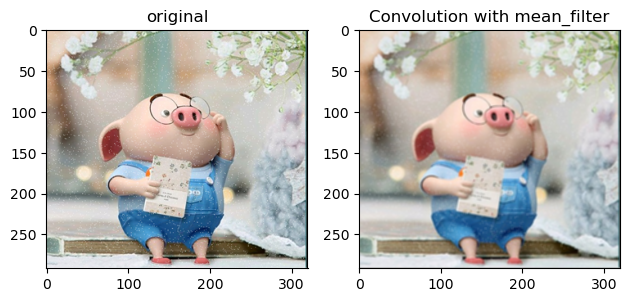

In [51]:
#均值滤波
img = plt.imread('pig_noise.png')
k1 = np.ones((3,3))/9
kernel_name = 'mean_filter'
method_t = 'tensordot'
start_time = time.time()
output1 = image_convolution(img,k1,method_t)
end_time = time.time()

In [52]:
print("Execution time: ", end_time - start_time, "seconds")

Execution time:  2.7240686416625977 seconds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


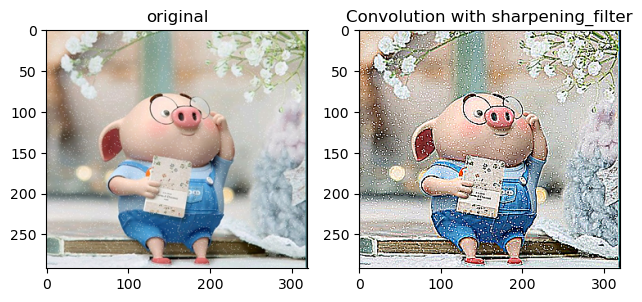

In [53]:
#图像锐化
img = plt.imread('pig_noise.png')
k2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
kernel_name = 'sharpening_filter'
method_t = 'tensordot'
start_time = time.time()
output2 = image_convolution(img,k2,method_t)
end_time = time.time()

In [55]:
print("Execution time: ", end_time - start_time, "seconds")

Execution time:  2.4581310749053955 seconds


试验einsum：

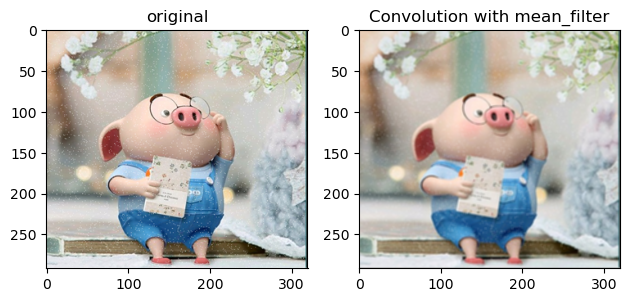

In [56]:
#均值滤波
img = plt.imread('pig_noise.png')
k1 = np.ones((3,3))/9
kernel_name = 'mean_filter'
method_e = 'einsum'
start_time = time.time()
output3 = image_convolution(img,k1,method_e)
end_time = time.time()

In [57]:
print("Execution time: ", end_time - start_time, "seconds")

Execution time:  1.341397762298584 seconds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


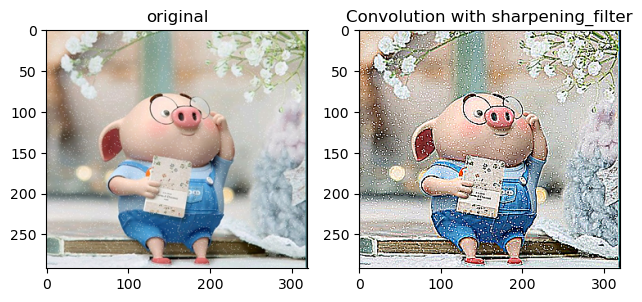

In [58]:
#图像锐化
img = plt.imread('pig_noise.png')
k2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
kernel_name = 'sharpening_filter'
method_e = 'einsum'
start_time = time.time()
output4 = image_convolution(img,k2,method_e)
end_time = time.time()

In [59]:
print("Execution time: ", end_time - start_time, "seconds")

Execution time:  1.2885098457336426 seconds
